# Resonant absorption imaging

This notebook provides an example of the methods and classes in ```cold_atom_imaging``` applied to computing the signal-to-noise ratio (SNR) in resonant absorption imaging.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Update the matplotlib configuration parameters:
plt.rcParams.update({'text.usetex': True,
                     'font.family': 'serif', 
                     'font.serif': 'STIX',
                     'mathtext.fontset': 'stix',
                     'font.size': 18,
                     'axes.grid': True,
                     'grid.color': 'gray',
                     'grid.alpha': 0.5,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.framealpha': 0.5,
                     'legend.loc': 'best',
                     'figure.figsize': (12, 12),
                     'savefig.dpi': 500,
                     'pdf.compression':9,
                    })

from physunits import *

## Signal-to-noise ratio estimate

This example deals with numerically estimating the SNR in the images of a cold atomic cloud. The estimate includes:

* Technical noise from the detector
* Photon shot noise

In choosing a commercially available detector, we can safely assume the technical specifications provided by the vendor to define the technical noise during an exposure. ```cold_atom_imaging``` provides a the ```camera``` class, which deals with commonly found sources of intensity noise. Last, in resonant absorption imaging the photon shot noise is usually the dominant source of noise.

Computing SNR for a target OD of 0.50
The saturation intensity corresponds to 342.8 p.e.
The detector sees a probe ranging 0.00 to 59.88 Isat
Your detector will saturate at 23035.1 p.e., or 67.19 Isat
The integrated absorbed number is 874244.6 p.e., or 3.10 the number from Beer's law
The peak SNR is 1.68, at ~ 3.48 Isat


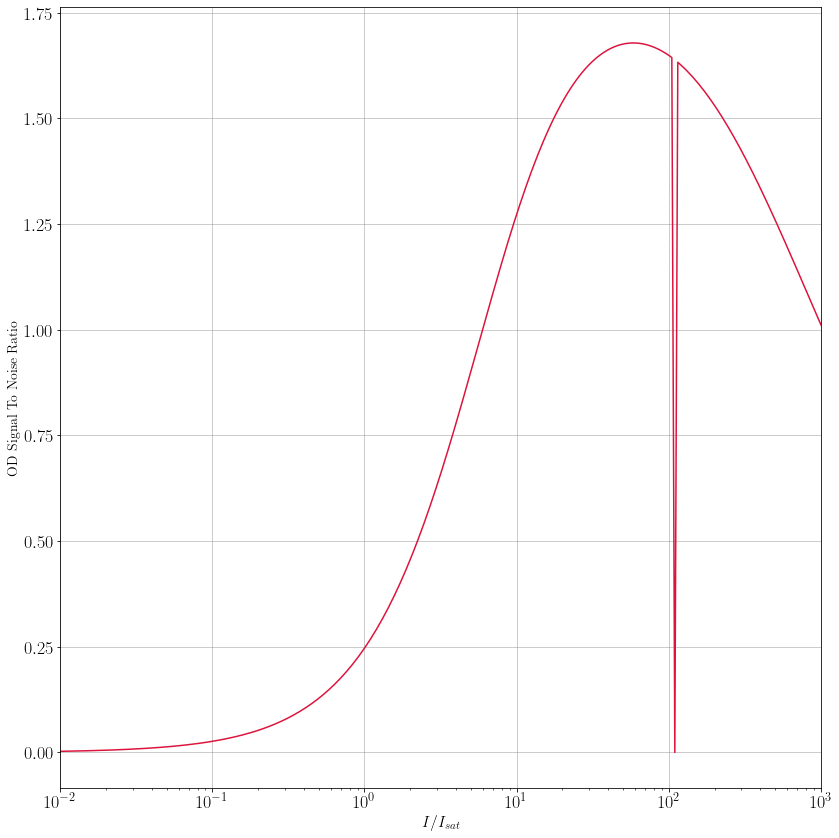

In [8]:
from cold_atom_imaging import *
from cameras import FLEA3 


# Imaging pulse
intensities = np.logspace(-3, 2, 2**8) * mW/(cm**2)
probe_pulse = light_pulse(wavelength=780.24*nm, intensity=intensities, duration=20*us)

# Sample
rb_87 = two_level_scatterer(resonant_wavelength=780.24*nm, Isat=1.67*mW/(cm**2), target_OD=0.5)

# Imaging system
microscope = camera(**FLEA3, magnification=6.0)

signaltonoise = absorption_SNR(probe_pulse, rb_87, microscope, technical_noise=True)
fig = plt.figure(num=1)
plt.plot(
    intensities[signaltonoise > 0], signaltonoise[signaltonoise > 0], c='crimson'
)
plt.xlabel(r'$I/I_{sat}$', fontsize=16)
plt.ylabel(r'OD Signal To Noise Ratio', fontsize=14)
plt.xscale('log')
plt.xlim(np.amin(intensities), np.amax(intensities))
plt.tight_layout()
plt.show()